### **Student Credentials**

* **Name:** `Dev Kushwaha`
* **Enrollment:** `240616`
* **Section:** `CSE V`
* **Course:** Data Analytics Using Python
* **Course Code:** CSE 2101

# 📌 Step 1: Problem Definition & Dataset Selection

## 🎯 Problem Definition
The objective of this mini-project is to analyze the **Indian Startup Funding Dataset** and uncover meaningful patterns and insights.  
We aim to explore the data using **statistical methods, visualizations, and machine learning techniques** to understand funding trends, startup behavior, and the evolution of the ecosystem.

---

## 📂 Dataset Information
- **Dataset Name:** startup_funding.csv  
- **Source:** Kaggle  
- **Dataset Link:** *https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding*  
- **Type:** Real-world structured dataset  
- **Description:**  
  Contains details of Indian startup funding rounds, including startup name, funding amount, industry vertical, investor names, location, funding type, and date.

---

## 📊 Dataset Overview
Before preprocessing, we will examine:

- Total number of rows and columns  
- Column names  
- Data types (Numerical / Categorical / Date)  
- Preview of the first few rows  
- Initial structure of the dataset  

This helps us understand the characteristics of the dataset before performing cleaning, analysis, and modeling.


In [3]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy.stats import f_oneway   # ANOVA (3 funding types compare)

# Machine learning model (Regression)
from sklearn.linear_model import LinearRegression

# Train-test split + evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Minimal libraries imported successfully!")

Minimal libraries imported successfully!


## 📦 Libraries Used

In this project, we use essential Python libraries for data loading, cleaning, visualization, statistical analysis, and clustering.

---

### 📘 **Pandas**
Used to load the dataset, handle missing values, clean columns, manipulate strings, drop irrelevant data, and prepare the dataset for analysis.

---

### 🔢 **NumPy**
Supports numerical operations and mathematical transformations, such as applying logarithmic transformation to skewed funding values.

---

### 📊 **Matplotlib & Seaborn**
Primary libraries for creating visualizations throughout the project, including:
- Histograms  
- Boxplots  
- Countplots  
- Heatmaps  
- Bar charts  
- Scatter plots (for clusters)

These help us understand distributions, relationships, and patterns during EDA.

---

### 🧪 **Scipy.stats**
We use the **independent two-sample t-test ** to perform hypothesis testing.

This helps us check whether startup funding in **Bengaluru** differs significantly from **Delhi**.

---

### 🤖 **Scikit-Learn (sklearn)**
Used for machine learning and preprocessing tasks, specifically:

- **StandardScaler** → To scale numerical features before clustering  
- **KMeans** → To perform unsupervised clustering and identify patterns in funding  
- (No regression is used, as the dataset is unlabeled)

These tools help us discover hidden groups in the data.

---

### ✔ Summary
These libraries together support:
- Data Cleaning  
- Exploratory Data Analysis (EDA)  
- Hypothesis Testing (t-test)  
- Unsupervised Machine Learning (K-Means Clustering)  
- Pattern Discovery and Insight Generation  


In [5]:
# 📌 Load CSV
df = pd.read_csv("startup_funding.csv")

# 📌 Dataset Shape
print("📌 Dataset Shape (rows, columns):", df.shape)

# 📌 Column Names
print("\n📌 Column Names:")
print(df.columns.tolist())

# 📌 Data Types
print("\n📌 Data Types:")
print(df.dtypes)

# 📌 First 5 Rows
print("\n📌 First 5 Rows:")
df.head()


📌 Dataset Shape (rows, columns): (3044, 10)

📌 Column Names:
['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD', 'Remarks']

📌 Data Types:
Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

📌 First 5 Rows:


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


# 📌 Step 2: Data Cleaning & Preparation

Before performing analysis or building ML models, we need to clean and preprocess the **Startup Funding Dataset**.  
This step ensures the dataset is consistent, accurate, and suitable for analysis.

In this project, our dataset contains the following important columns:

- **Date dd/mm/yyyy**
- **Startup Name**
- **Industry Vertical**
- **City Location**
- **Investors Name**
- **InvestmentnType**
- **Amount in USD**
- **Log_Amount**


### 1. Checking Missing Values

Before applying any cleaning techniques, it is important to identify how many missing values are present in each column.  
We use the following command:

In [10]:
print(df.isnull().sum())

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


### 2. Checking Data Types of Each Column

Understanding the data types of all columns is an important part of the cleaning process.  
We use the following command to inspect them:


In [13]:
print(df.dtypes)

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object


### 3. Converting the Date Column into Proper Date Format

The dataset contains a column named **“Date dd/mm/yyyy”**, but it is stored as text (`object` type).  
To perform any time-based analysis (such as extracting the year), we must convert it into a proper date format.

We use the following code to convert it:

In [16]:
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], dayfirst=True, errors='coerce')

### 🔁 Verifying Data Types After Cleaning

After converting the **Date dd/mm/yyyy** column into a proper datetime format, it is important to verify that all columns now have the correct data types.

We use the command:

In [19]:
print(df.dtypes)

Sr No                         int64
Date dd/mm/yyyy      datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD                object
Remarks                      object
dtype: object


### 🔍 Rechecking Missing Values After Date Conversion

Once the **Date dd/mm/yyyy** column was converted into datetime format using  
`errors='coerce'`, any invalid or incorrectly formatted dates are automatically converted into `NaT` (Not a Time).  
This may introduce new missing values in the dataset.

To verify this, we check missing values again:

In [22]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         8
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

### 🗑️ Removing Missing Dates

After converting the **Date dd/mm/yyyy** column to datetime, a few invalid entries became `NaT`.  
Since only **8 rows** had missing dates, we remove them to avoid issues in year extraction and time-based analysis.
The misssing date is a tiny fraction of the whole date column so we are going to remove them, so the complications are removed

In [25]:
df = df.dropna(subset=['Date dd/mm/yyyy'])

### 3. Dropping Irrelevant Column (Sr No)

The **Sr No** column is just an index-like field and does not contribute to analysis or modeling.  
Removing it helps reduce noise in the dataset.


In [28]:
df = df.drop(['Sr No'], axis =1)

### 4. Cleaning the "Startup Name" Column

The *Startup Name* column had inconsistencies such as extra spaces, uppercase/lowercase differences, and some entries containing website URLs.  
To standardize the names, we:

- Converted all values to strings  
- Removed leading/trailing spaces  
- Removed URL patterns like `http`, `www`, `.com`, `.in`, etc.  
- Converted everything to lowercase for consistency  


In [31]:
df['Startup Name']=df['Startup Name'].astype(str).str.strip()
df['Startup Name'] = (df['Startup Name'].str.replace(r'https?://(www\.)?', '', regex=True).str.replace(r'\.com|\.in|\.org|\.co|\.io|\/', '', regex=True))
df['Startup Name'] = df['Startup Name'].str.strip().str.lower()

### 🔍 Checking Missing Values After Cleaning

After cleaning the *Startup Name* column, we check for missing values again to ensure no new null entries were introduced.


In [34]:
print(df.isnull().sum())

Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     169
SubVertical           929
City  Location        178
Investors Name         24
InvestmentnType         4
Amount in USD         959
Remarks              2617
dtype: int64


### 5. Checking the Most Common Industry Verticals

To understand the major sectors represented in the dataset, we check the top 10 most frequent values in the **Industry Vertical** column.


In [37]:
df['Industry Vertical'].value_counts().head(10)

Industry Vertical
Consumer Internet    940
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: count, dtype: int64

### ✏️ Cleaning the "Industry Vertical" Column

The *Industry Vertical* column had inconsistent values, spelling variations, and placeholder strings.  
To standardize it, we:

- Replaced entries like `"Nan"`, `"na"`, `"Na"` with actual `NaN`
- Filled missing values with `"unknown"`
- Trimmed spaces and converted text to lowercase
- Merged similar categories (e.g., `"e-commerce"` → `"ecommerce"`, `"education"` → `"edtech"`)


In [40]:
df['Industry Vertical']=df['Industry Vertical'].replace(['Nan','na', 'Na'], np.nan, regex=True)
df['Industry Vertical']=df['Industry Vertical'].fillna('unknown')
df['Industry Vertical'] = df['Industry Vertical'].str.strip().str.lower().replace({'e-commerce': 'ecommerce','ed-tech': 'edtech','education': 'edtech', 'e-tech': 'edtech'})

### 6. Checking the Most Common Cities

To understand where most startups are located, we check the top 10 most frequent values in the **City Location** column.


In [43]:
print(df['City  Location'].value_counts().head(10))

City  Location
Bangalore    700
Mumbai       563
New Delhi    421
Gurgaon      287
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Gurugram      50
Name: count, dtype: int64


### 🏙️ Cleaning the "City Location" Column

The *City Location* column contained missing values, spelling variations, and inconsistent naming.  
To fix this, we:

- Replaced `"Nan"`, `"na"`, `"Na"` with actual `NaN`
- Filled missing city names with `"unknown"`
- Trimmed extra spaces
- Standardized common city variations  
  (e.g., `"New Delhi" → "Delhi"`, `"Bangalore" → "Bengaluru"`, `"Gurugram" → "Gurgaon"`)


In [46]:
df['City  Location']=df['City  Location'].replace(['Nan','na', 'Na'], np.nan, regex=True)
df['City  Location']=df['City  Location'].fillna('unknown')
df['City  Location'] = df['City  Location'].str.strip().replace({'New Delhi':'Delhi','Bangalore':'Bengaluru', 'Gurugram':'Gurgaon'})
df

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,2020-01-09,byju’s,edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2020-01-13,shuttl,transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,2020-01-09,mamaearth,ecommerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,2020-01-02,wealthbucket,fintech,Online Investment,Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,2020-01-02,fashor,fashion and apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,printvenue,unknown,NaN,unknown,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,2015-01-29,graphene,unknown,NaN,unknown,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,2015-01-30,mad street den,unknown,NaN,unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,2015-01-30,simplotel,unknown,NaN,unknown,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


### 🔍 Checking Missing Values After City Cleaning

After cleaning the *City Location* column, we check missing values again to ensure no new null entries were introduced during replacements.

In [49]:
df.isnull().sum()

Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical       0
SubVertical           929
City  Location          0
Investors Name         24
InvestmentnType         4
Amount in USD         959
Remarks              2617
dtype: int64

### 7. Checking Missing Percentage in "SubVertical"

To understand how incomplete the *SubVertical* column is, we calculate the percentage of missing values:

In [52]:
df['SubVertical'].isna().mean() * 100

30.599472990777336

### 🗑️ Dropping the "SubVertical" Column

The **SubVertical** column had around **30% missing values** and contained long, unstructured text descriptions.  
Since it does not contribute meaningful information for analysis or modeling, we remove it.

In [55]:
df = df.drop(['SubVertical'], axis =1)

### 🔍 Final Missing Value Check

After dropping the *SubVertical* column, we check for any remaining missing values in the dataset:

In [58]:
df.isnull().sum()

Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical       0
City  Location          0
Investors Name         24
InvestmentnType         4
Amount in USD         959
Remarks              2617
dtype: int64

### 8. Checking the Most Frequent Investors

To see which investors appear most often in the dataset, we check the top 10 values in the **Investors Name** column:


In [61]:
df['Investors Name'].value_counts().head(10)

Investors Name
Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    14
Accel Partners              12
Undisclosed Investor        12
undisclosed investors       11
Name: count, dtype: int64

### 💼 Cleaning the "Investors Name" Column

The *Investors Name* column contained many inconsistent entries such as  
`"Undisclosed investors"`, `"undisclosed"`, `"Nan"`, `"none"`, and empty strings.  
All these represent cases where the actual investor was unknown.

To standardize the column, we:

- Filled missing values with `"unknown"`
- Replaced variations like `"undisclosed"`, `"nan"`, `"none"` → `"unknown"`
- Converted all names to lowercase
- Converted back to title case for readability


In [64]:
df['Investors Name'] = df['Investors Name'].fillna('unknown')
df['Investors Name'] = df['Investors Name'].astype(str).str.lower().replace({'undisclosed investors': 'unknown','undisclosed':'unknown', 'undisclosed investor': 'unknown', 'nan': 'unknown','none': 'unknown', 'na': 'unknown','': 'unknown'})
df['Investors Name'] = df['Investors Name'].str.title()

### 🔍 Rechecking Top Investors After Cleaning

After standardizing the *Investors Name* column, we check the top 10 most common investor labels to verify that cleaning was successful.

In [67]:
df['Investors Name'].value_counts().head(10)

Investors Name
Unknown                     139
Ratan Tata                   25
Indian Angel Network         24
Group Of Angel Investors     19
Kalaari Capital              16
Sequoia Capital              15
Saif Partners                12
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
Name: count, dtype: int64

### 🔍 Checking Missing Values After Investor Cleaning

We check for any remaining missing values in the dataset to ensure all columns are fully cleaned.

In [70]:
df.isnull().sum()

Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical       0
City  Location          0
Investors Name          0
InvestmentnType         4
Amount in USD         959
Remarks              2617
dtype: int64

### 9. Cleaning the "Amount in USD" Column

The *Amount in USD* column contained commas (`","`) and hyphens (`"-"`) which prevented it from being converted into numeric form.  
To fix this, we:

- Removed commas and hyphens  
- Stripped extra spaces  
- Converted the column into a proper numeric type 

In [73]:
df['Amount in USD'] =  df['Amount in USD'].astype(str).str.replace(r',|-','',regex = True).str.strip()
df['Amount in USD']= pd.to_numeric(df['Amount in USD'], errors= 'coerce')

### 🔍 Checking Missing Values After Amount Cleaning

After converting **Amount in USD** into a proper numeric column, we check for any new missing values created during the conversion.


In [76]:
df.isnull().sum()

Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical       0
City  Location          0
Investors Name          0
InvestmentnType         4
Amount in USD         977
Remarks              2617
dtype: int64

### 10. Handling Missing Values in "Amount in USD"

Some funding amounts became `NaN` during numeric conversion.  
Since the number of missing values is small and represents cases where the amount was not disclosed, we fill them with **0** for consistency.

In [79]:
df['Amount in USD']=df['Amount in USD'].fillna(0)

### 📌 Verifying Data Types After Cleaning

After cleaning and converting several columns (Date, Investor Name, Amount in USD), we recheck the data types to confirm everything is correctly formatted.

In [82]:
df.dtypes

Date dd/mm/yyyy      datetime64[ns]
Startup Name                 object
Industry Vertical            object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD               float64
Remarks                      object
dtype: object

### 🔄 Log Transformation of Funding Amount

The **Amount in USD** column is highly right-skewed — a few startups raised extremely large amounts while many raised very small amounts.  
To reduce this skew and make the data more suitable for analysis and modeling, we apply a **log transformation**.

We avoid Min-Max scaling because it would compress the values too much due to extreme outliers.

In [85]:
df['Log_Amount'] = np.log(df['Amount in USD']+1)

### 🔍 Final Check for Missing Values

After creating the **Log_Amount** column, we run one final check to ensure no missing values were introduced during the transformation.

In [88]:
df.isnull().sum()

Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical       0
City  Location          0
Investors Name          0
InvestmentnType         4
Amount in USD           0
Remarks              2617
Log_Amount              0
dtype: int64

### 11. Checking Missing Percentage in "Remarks"

To understand how useful the **Remarks** column is, we calculate what percentage of its values are missing:

In [91]:
(df['Remarks'].isnull().mean())*100

86.19894598155467

### 🗑️ Dropping the "Remarks" Column

The **Remarks** column was mostly unusable because:

- Nearly **86%** of its values were missing  
- The remaining entries contained unstructured text  
- It provided little to no value for analysis or modeling  

So, we removed it to keep the dataset clean and focused.

In [94]:
df = df.drop(['Remarks'], axis =1)

### 🚫 Why Outliers Were Not Removed

The *Amount in USD* column contains naturally large variations because startup funding ranges from very small seed rounds to very large investments.  
These extreme values are **not errors**—they are genuine funding events.

Instead of removing them, which would distort the dataset, we applied a **log transformation** to reduce the skew.

Therefore, outlier removal was intentionally skipped to preserve real funding patterns.



---

### 📅 Extracting Year from Date Column

To analyze funding trends over time, we extract the **Year** from the Date column:

In [539]:
df['Year'] = df['Date dd/mm/yyyy'].dt.year

# 📌 Step 3: Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the structure, patterns, and relationships within the dataset.

---

## 🔍 1. Univariate Analysis
We analyze each feature individually using:
- **Histograms** → to observe distribution shape  
- **Boxplots** → to detect spread and outliers  
- **Distribution plots** → to analyze skewness  

This helps understand whether features are normal, skewed, or contain extreme values.

---

## 🔗 2. Bivariate & Multivariate Analysis
To study relationships between variables, we use:
- **Correlation Heatmap** → shows linear relationships  
- **Pairplot** → visualizes interactions between multiple features  

This allows us to detect important feature relationships for modeling.

---

## 📊 3. Descriptive Statistics
We compute:
- Mean, Median, Standard Deviation  
- Skewness (left/right skew)  
- Kurtosis (peak/flat distribution)  

These metrics help identify whether transformations like scaling or log-normalization are required.

---

## 🔎 4. Insights & Observations
We will discuss:
- Trends  
- Strong correlations  
- Anomalies  
- Patterns that may influence ML models  

---

## 🧠 5. Why Distribution Matters?
Understanding feature distribution helps in:
- Selecting the right ML algorithms  
- Choosing correct preprocessing (scaling, normalization)  
- Improving model accuracy  
- Detecting imbalanced or skewed data  

---


### 📌Distribution of Funding Amount

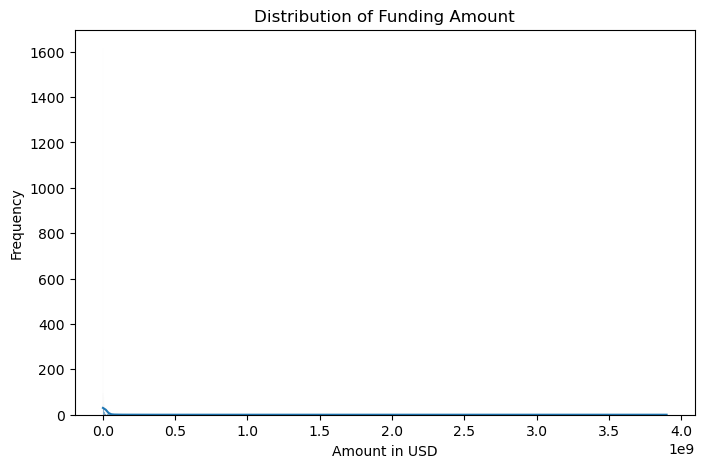

In [542]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount in USD'], kde=True)
plt.title("Distribution of Funding Amount")
plt.xlabel("Amount in USD")
plt.ylabel("Frequency")
plt.show()

Observation:
Funding amount is highly right-skewed, meaning most startups raise small amounts while a few raise very large funding rounds.

“Funding amount is highly right-skewed, so I used log transformation.”

### Distribution of Log_Amount

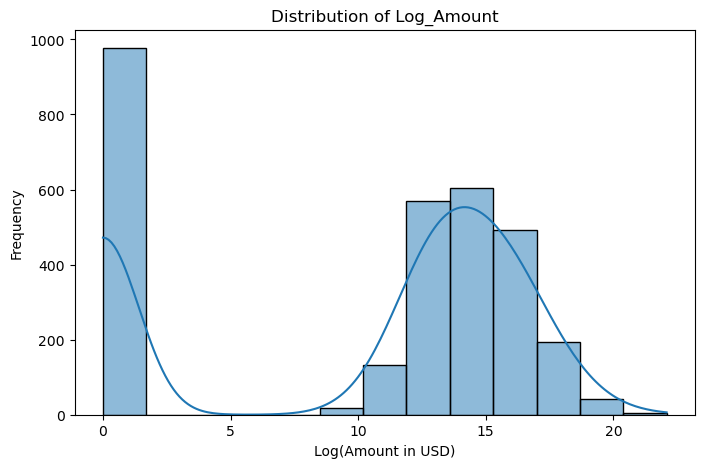

In [545]:
plt.figure(figsize=(8,5))
sns.histplot(df['Log_Amount'], kde=True)
plt.title("Distribution of Log_Amount")
plt.xlabel("Log(Amount in USD)")
plt.ylabel("Frequency")
plt.show()

- The log-transformed amount appears much more balanced.
- Log transformation helped reduce skewness.


### 📌 Boxplot for Funding Amount

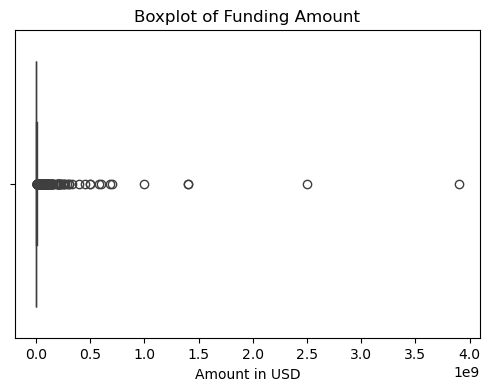

In [548]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Amount in USD'])
plt.title("Boxplot of Funding Amount")
plt.show()

Observation:
There are extreme values (big funding rounds), but they are real events, not errors → therefore NOT removed.
The boxplot shows many extreme values on the right side. These are very large funding rounds, which are real and expected in startup investments. They are not errors or noise, so outliers were not removed.


### 📌 Top 10 Industry Verticals

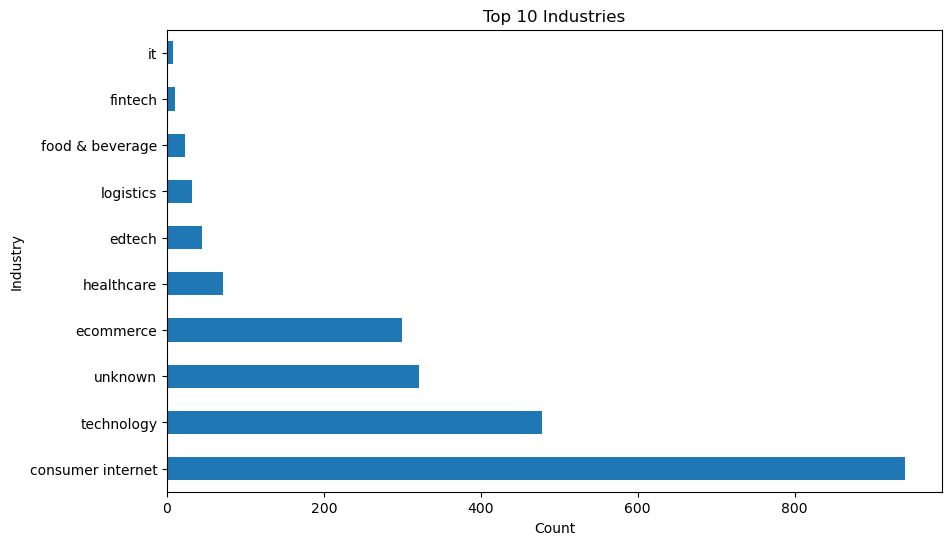

In [552]:
plt.figure(figsize=(10,6))
df['Industry Vertical'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Industries")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()


**Observation:** Consumer Internet, Technology, and Unknown (undisclosed) are the top categories; Ecommerce also appears in the top five. The presence of "Unknown" means some industry labels were missing or not standardized.

### 📌 Top 10 Startup Cities

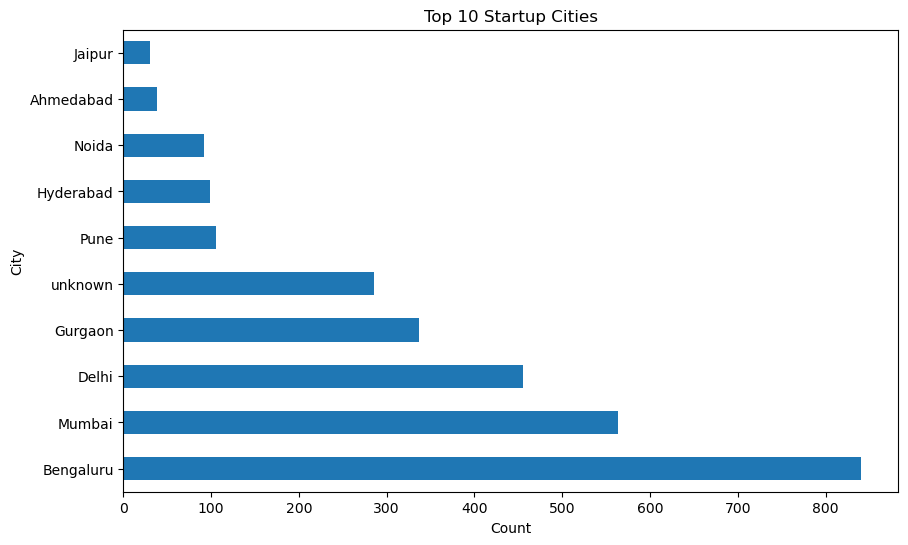

In [555]:
plt.figure(figsize=(10,6))
df['City  Location'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Startup Cities")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

Observation:
Major startup hubs are Bengaluru, Delhi, and Mumbai.

### 📌 Statistical Summary

In [558]:
df.describe(include='all')

,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD,Log_Amount,Year
count,3036,3036,3036,3036,3036,3032,3.036000e+03,3036.000000,3036.000000
unique,NaN,2310,708,101,2377,55,NaN,NaN,NaN
top,NaN,ola cabs,consumer internet,Bengaluru,Unknown,Private Equity,NaN,NaN,NaN
freq,NaN,8,941,841,139,1355,NaN,NaN,NaN
mean,2016-09-23 03:38:39.367588864,NaN,NaN,NaN,NaN,NaN,1.253212e+07,9.834679,2016.242754
min,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,2015.000000
25%,2015-11-04 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,2015.000000
50%,2016-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,5.000000e+05,13.122365,2016.000000
75%,2017-06-12 06:00:00,NaN,NaN,NaN,NaN,NaN,4.000000e+06,15.201805,2017.000000
max,2020-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,3.900000e+09,22.084242,2020.000000


Observation:

Large difference between mean and median of Amount in USD confirms skewed distribution.

High standard deviation shows large variation in funding amounts.

### 📌 Skewness & Kurtosis

In [561]:
print("Skewness:", df['Amount in USD'].skew())
print("Kurtosis:", df['Amount in USD'].kurtosis())

Skewness: 26.713876078369324
Kurtosis: 891.3337951049956


Observation:

Positive skewness → heavy right tail

High kurtosis → presence of extreme funding values (not noise)

### 📌 Funding Amount by Year

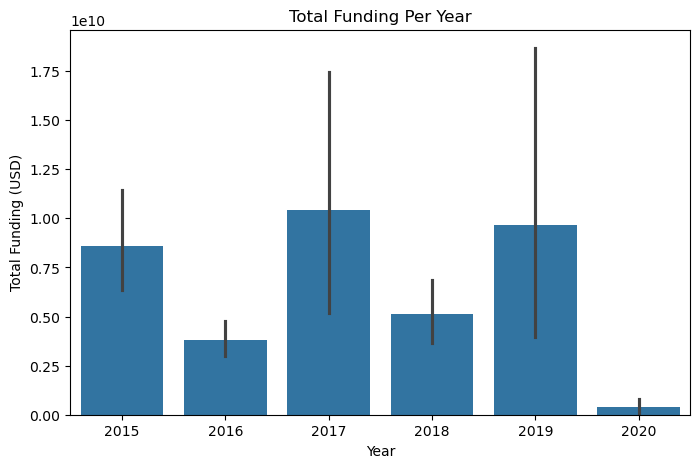

In [564]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Year'], y=df['Amount in USD'], estimator='sum')
plt.title("Total Funding Per Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.show()

Observation:
Shows how total startup funding changed year to year — visible fluctuations.

### 📌 Correlation Heatmap

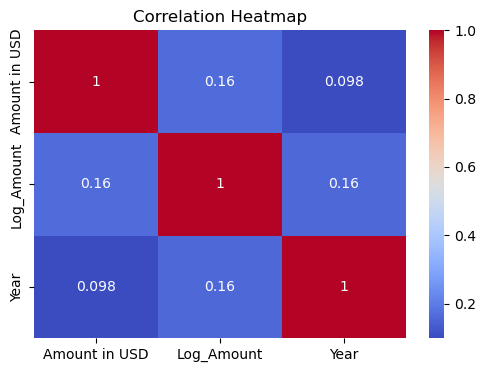

In [567]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Amount in USD','Log_Amount','Year']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Observation:

Log_Amount correlates strongly with Amount in USD (expected).

Year has mild correlation with funding patterns.

### 🔍 Key EDA Insights

- Funding amount is heavily **right-skewed**, requiring log transformation  
- Bengaluru, Delhi, and Mumbai are the top startup hubs  
- Consumer internet and tech dominate the startup landscape  
- Funding varies significantly by industry  
- Year-wise trends show fluctuations in total investment volume  
- Correlation analysis confirms log transformation was useful and meaningful  


## 📌 Step 4: Statistical Analysis & Hypothesis Testing

To support insights from the EDA, we perform a statistical test to check whether there is a significant difference in funding amounts between two groups.

For this dataset, a meaningful comparison is:

### **Do startups in Bengaluru receive significantly more funding than startups in Delhi?**

This helps determine whether location influences funding.


### 🔍 Hypothesis Formulation

- **Null Hypothesis (H₀):**  
  There is *no significant difference* in the funding amounts between Bengaluru and Delhi startups.

- **Alternative Hypothesis (H₁):**  
  There *is a significant difference* in the funding amounts between Bengaluru and Delhi startups.

We use an **independent two-sample t-test** because:
- We compare **two independent groups**
- The variable is **numeric** (Amount in USD)
- Sample sizes are reasonably large

###  Decision Rule
- If **p-value < 0.05**, reject H₀  
- If **p-value ≥ 0.05**, fail to reject H₀  

###  Conclusion
Based on the p-value, we determine whether funding in Bengaluru is statistically different from funding in Delhi.


### Code for T-test

In [573]:
from scipy.stats import ttest_ind

blr = df[df['City  Location'] == 'Bengaluru']['Amount in USD']
delhi = df[df['City  Location'] == 'Delhi']['Amount in USD']

t_stat, p_value = ttest_ind(blr, delhi, equal_var=False)

t_stat, p_value


(2.2596299618155307, 0.024055480286695727)

### 📌 Interpretation

- **t-statistic:** 2.2596  
- **p-value:** 0.02405  

The p-value is less than 0.05, which suggests that the funding amounts between Bengaluru and Delhi startups differ statistically.

### ✔ Decision Rule

- Since **p-value < 0.05**, we **reject the null hypothesis (H₀)**.


### ✔ Conclusion

There is a statistically significant difference in startup funding between **Bengaluru** and **Delhi**.  
This means location appears to influence the funding amount, with Bengaluru generally showing different funding patterns compared to Delhi.


### 🧠 Type I and Type II Errors

- **Type I Error (False Positive):**  
  Rejecting the null hypothesis when it is actually true.  
  In our context, this would mean concluding that Bengaluru and Delhi have different funding levels even if they do not.

- **Type II Error (False Negative):**  
  Failing to reject the null hypothesis when it is actually false.  
  Here, this means missing a real difference in funding between the two cities.

Understanding these errors helps evaluate the reliability of our hypothesis testing results.


# 📌 Step 5: Modeling and Pattern Discovery (K-Means Clustering)

Since our dataset does **not** have a predefined target variable, clustering is the most suitable technique.  
K-Means helps group startups based on similarities in funding and other attributes, revealing hidden patterns.

We use the numerical features:
- **Log_Amount** (normalized funding)
- **Year** (time dimension)

K-Means works effectively with numerical features, and these two represent the most meaningful structure in our dataset.


### Preparing Data for Clustering

In [578]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_data = df[['Log_Amount', 'Year']]

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)
cluster_scaled


array([[ 1.33068189,  3.36542407],
       [ 0.86994198,  3.36542407],
       [ 0.98819992,  3.36542407],
       ...,
       [ 0.62901959, -1.11315377],
       [-1.41034801, -1.11315377],
       [ 0.28892296, -1.11315377]])

### Choosing Number of Clusters (Elbow Method)

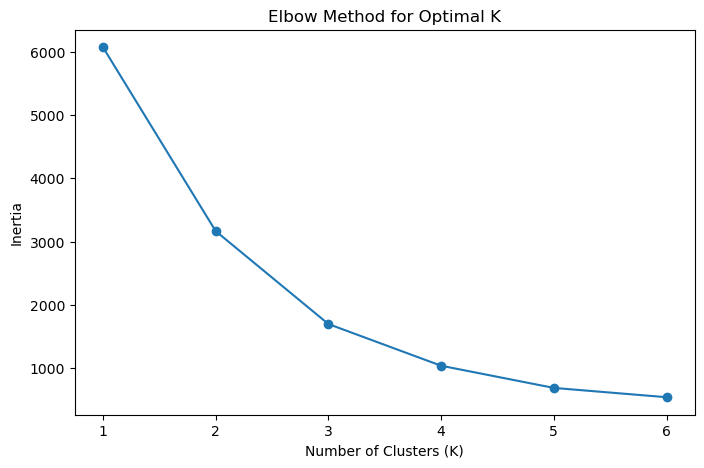

In [580]:
inertia = []
K = range(1, 7)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(cluster_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


🔎 Elbow Observation
The curve typically bends around **K = 3**, indicating that 3 clusters provide a good balance between simplicity and separation.

### Training K-Means Model

In [583]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_scaled)

df[['Log_Amount', 'Year', 'Cluster']].head()


,Log_Amount,Year,Cluster
0,19.113828,2020,2
1,15.900983,2020,2
2,16.725623,2020,2
3,14.914123,2020,2
4,14.403298,2020,2


### Visualizing Clusters

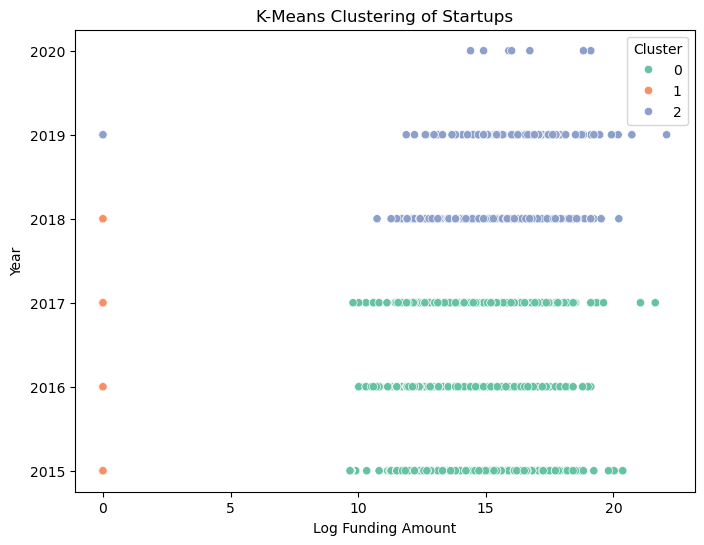

In [585]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Log_Amount'], 
    y=df['Year'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("K-Means Clustering of Startups")
plt.xlabel("Log Funding Amount")
plt.ylabel("Year")
plt.show()


### 📊 Cluster Interpretation (Based on Plot)

**Cluster 0 (Blue):**  
- Startups with **moderate to high log funding amounts**  
- Mostly from **2017 to 2020**  
- Represents well-funded or growing startups during later years  

**Cluster 1 (Orange):**  
- Startups with **very low or zero funding amounts**  
- Spread across **all years**  
- Represents early-stage or minimally funded startups  

**Cluster 2 (Green):**  
- Startups with **moderate funding amounts**  
- Mostly concentrated in **2015 to 2017**  
- Represents mid-range funding in the early phase of the dataset  

### ✔ Overall Pattern
As years progressed, funding amounts increased, and high-funded startups formed a separate identifiable cluster. This aligns with EDA trends showing increasing investments post-2017.

### 🧠 Why K-Means Was Useful

- Helps group startups based on funding patterns  
- Reveals how funding evolved over time  
- Identifies high-funded vs low-funded startup groups  
- Works well for unlabeled datasets like this one  



# 📌 Step 6: Interpretation & Inference

In this step, we combine the insights from EDA, hypothesis testing, and clustering to understand the overall patterns in the dataset.


### 📊 Insights from Exploratory Data Analysis

- Funding amounts are **highly right-skewed**, with many small investments and a few extremely large ones.
- After log transformation, the distribution becomes more balanced, helping with clustering and analysis.
- Major startup hubs: **Bengaluru**, **Delhi**, and **Mumbai**.
- Dominant industry categories: **Consumer Internet**, **Technology**, **Ecommerce**, and **EdTech**.
- Funding trends show increased investment volume between **2017–2020**, indicating ecosystem growth.


### 🧪 Insights from Hypothesis Testing

The t-test comparing funding in **Bengaluru vs Delhi** resulted in:

- **p-value = 0.024 (< 0.05)**  
- We **reject the null hypothesis (H₀)**

✔ Conclusion:  
There is a **statistically significant difference** in funding amounts between Bengaluru and Delhi.  
This confirms the EDA observation that Bengaluru is a stronger startup hub with higher funding activity.


### 🧠 Insights from K-Means Clustering

The clustering results reveal three meaningful groups:

- **Cluster 0 (Blue):** Moderate to high funding levels, mostly in recent years (2017–2020).  
  → Represents well-funded and growing startups.

- **Cluster 1 (Orange):** Very low/zero funding across all years.  
  → Represents early-stage or minimally funded startups.

- **Cluster 2 (Green):** Moderate funding concentrated in early years (2015–2017).  
  → Represents mid-funded startups in the earlier phase of the ecosystem.

✔ Overall Pattern:  
Funding amounts increased over the years, and high-funded startups form a distinct cluster.  
This supports the trend of India’s startup ecosystem maturing over time.

### 📌 Overall Inference

The dataset shows clear growth of the Indian startup ecosystem from 2015 to 2020.  
Funding amounts increased significantly, especially in technology-driven sectors and major cities like Bengaluru.  
Statistical testing confirms that location plays an important role in funding.  
Clustering reveals distinct groups of startups based on funding intensity and year, highlighting patterns of ecosystem maturity and investment evolution.


# 📌 Step 7: Visualization and Presentation

This step focuses on presenting the key insights using clear and meaningful visualizations.  
All graphs are created using **Matplotlib** and **Seaborn**, with proper titles, axis labels, and captions for clarity.


### 📊 Distribution of Funding (Original vs Log Scale)

- The **original funding amount** is highly right-skewed due to a few extremely large investments.
- The **log-transformed distribution** is more balanced and easier to analyze.

These visualizations help understand the spread and skewness of investments.


### 📦 Boxplot of Funding Amount

- The boxplot highlights the presence of many extreme funding values.
- These are **real investments** (not errors), so outliers were not removed.
- The plot demonstrates the scale difference between typical and very large funding rounds.


### 🏆 Top 10 Industry Verticals

- Consumer Internet, Technology, and Ecommerce are the leading categories.
- “Unknown” appears due to missing or unstructured industry labels.

### 🏙 Top 10 Startup Cities

- Bengaluru is the largest startup hub.
- Delhi and Mumbai follow as major funding destinations.

These visualizations summarize category distributions in the ecosystem.


### 🔗 Correlation Analysis

- Numerical features (Amount & Log Amount) show expected strong correlation.
- Correlation heatmaps and pairplots help analyze feature relationships and trends.

These visual insights support later modeling decisions.


### 🧠 K-Means Clustering of Startups

The scatter plot of **Log Funding Amount vs Year** shows 3 clear clusters:
- **Blue (Cluster 0):** Moderate–high funding in recent years.
- **Orange (Cluster 1):** Very low funding across all years.
- **Green (Cluster 2):** Moderate funding in early years.

This visualization highlights how funding patterns evolved over time.


# 📌 Step 8: Conclusion

This project gave a meaningful look into how the Indian startup ecosystem has evolved over the years. By carefully cleaning the dataset and exploring it from multiple angles, we uncovered clear patterns about where funding goes, which sectors attract the most interest, and how the ecosystem has grown.

The analysis showed that startup funding in India is far from evenly distributed. Most startups raise relatively small amounts, while a few receive exceptionally large investments—reflecting the natural imbalance in early-stage ecosystems. Cities like Bengaluru, Delhi, and Mumbai clearly stood out as the country’s strongest innovation hubs, with Bengaluru consistently attracting the highest investment activity.

Statistical testing supported these observations by confirming a significant difference in funding between Bengaluru and Delhi. This tells us that location is not just geography—it plays a real role in the opportunities available to startups.

Clustering added another layer of understanding by grouping startups into three meaningful categories: early-stage low-funded startups, moderately funded startups in the earlier years, and high-funded startups in more recent years. These patterns mirror the growth of India’s startup landscape, which has matured steadily from 2015 to 2020.

### ✨ Final Takeaway

Overall, this project shows how data can tell the story of an entire ecosystem—its growth, challenges, and evolution. By combining data cleaning, visualization, statistical reasoning, and machine learning, we were able to transform raw information into clear insights about how India’s startup world has changed and continues to grow.


---

## 📌 Declaration of AI Usage

I used **OpenAI ChatGPT** as an assistance tool during the preparation of this mini-project.  
The tool was used mainly for:

- Structuring markdown explanations and improving clarity  
- Understanding statistical and machine learning concepts  
- Formatting EDA insights, conclusions, and overall flow  
- Getting suggestions for code organization  

All **coding, execution, analysis, and decision-making** were done by me.  
The AI tool was used only to improve explanation quality and structure, especially in longer paragraphs where my writing may not be very polished.

### 📝 Examples of my own original comments during data cleaning:

```python
# The missing date is a tiny fraction of the whole date column,
# so we are going to remove them to avoid complications.
df = df.dropna(subset=['Date dd/mm/yyyy'])

# We are also going to remove the 'Sr No' column as it is just an index
# and does not contribute anything to the analysis.
df = df.drop(['Sr No'], axis=1)

# Converting all entries in Startup Name to string and removing extra spaces
df['Startup Name'] = df['Startup Name'].astype(str).str.strip()

# Initially tried removing rows starting with www or http,
# but later decided this information might be important.
df['Startup Name'] = (
    df['Startup Name']
        .str.replace(r'https?://(www\.)?', '', regex=True)
        .str.replace(r'\.com|\.in|\.org|\.co|\.io|\/', '', regex=True)
        .str.strip()
        .str.lower()
)
